## Quiz 2 Titanic Data Visualization Submission

Hailey Richardson
09/13/2025

In [1]:
## Load in libraries

import matplotlib.pyplot as plt
import seaborn as sns

### In-class activities: Try to make data visualizaiton by yourself

See the data with about Titanic. Try to make three data visualization to study how other features affect the "survived" (whether the person survived from the Titanic disaster). Once you finish, show your figures to the neighbors and describe the figures to them. 

Note: This is not a complete data, feel free to remove the missing valuesv(or do any other data pre-processing) before you making the plots. 

In [ ]:
## Load in dataset

titanic_data = sns.load_dataset('titanic')
print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:
# Summary of nulls
print(titanic_data.isnull().sum())

# Drop 'deck' 
titanic_data = titanic_data.drop(columns=['deck'])

# Fill numerical nulls with median
titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].median())
titanic_data['fare'] = titanic_data['fare'].fillna(titanic_data['fare'].median())

# Fill categorical nulls with mode
titanic_data['embarked'] = titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0])
titanic_data['embark_town'] = titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0])

# Confirm cleanup
print(titanic_data.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


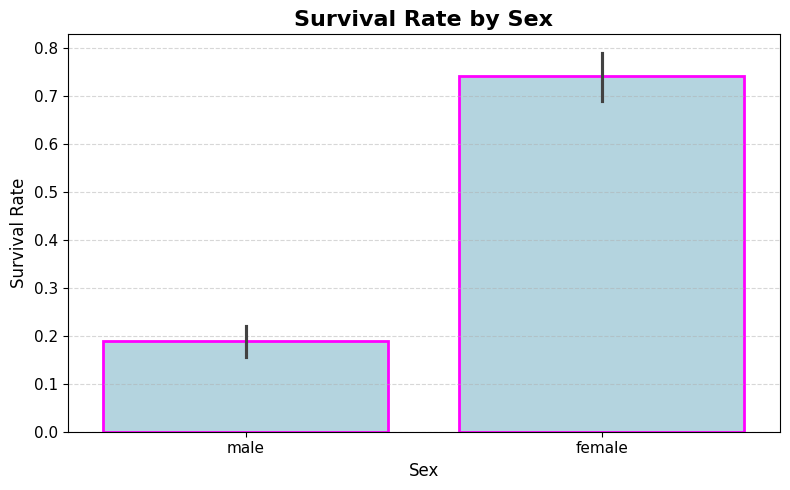

In [4]:
# Visualization 1: bar plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=titanic_data,
    x='sex',
    y='survived',
    color='lightblue',     # Single color
    edgecolor='magenta',   # Edge color
    linewidth=2
)

# Titles and labels
plt.title('Survival Rate by Sex', fontsize=16, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Ticks and grid
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

This bar chart shows that females had a much higher survival rate (approximately 75%) compared to males (approximately 18%) on the Titanic. The error bars indicate confidence intervals around these survival rate estimates.

/tmp/ipykernel_2705/1457878835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic_data, x='survived', y='age', palette='Set2')


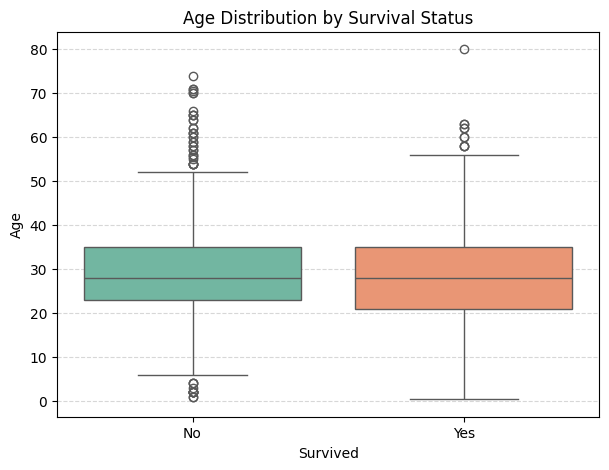

In [5]:
# Visualization 2: Box plot: Age vs Survival
plt.figure(figsize=(7, 5))
sns.boxplot(data=titanic_data, x='survived', y='age', palette='Set2')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

This box plot reveals that survivors and non-survivors had similar median ages (around 28-30 years), but non-survivors show a slightly wider age distribution. Both groups have numerous outliers, particularly older passengers.

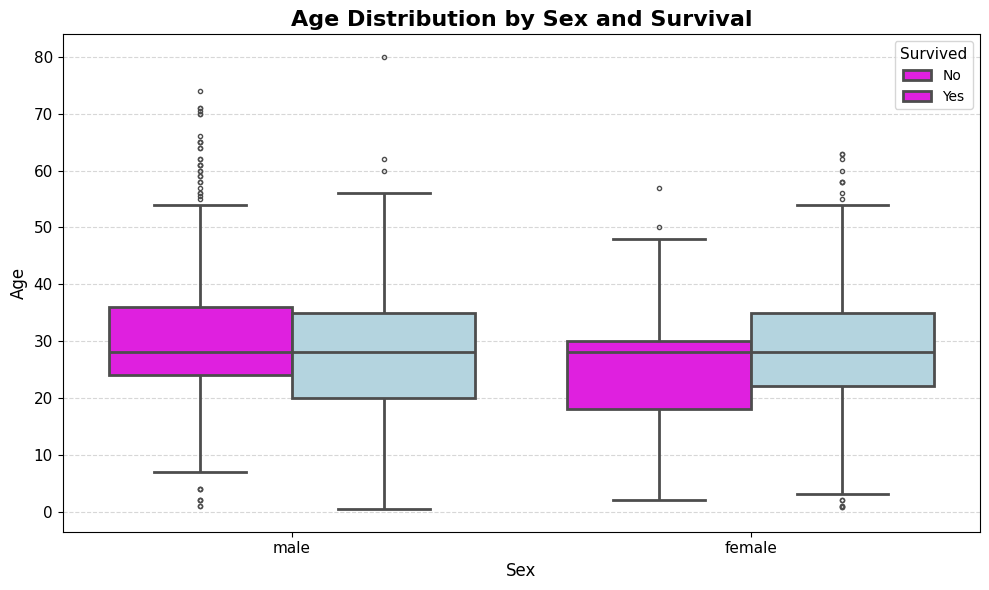

In [6]:
# Visualization 3: side by side boxplot

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=titanic_data,
    x='sex',
    y='age',
    hue='survived',
    palette=['magenta', 'lightblue'],
    linewidth=2,
    fliersize=3
)

# Titles and labels
plt.title('Age Distribution by Sex and Survival', fontsize=16, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Customize legend
plt.legend(title='Survived', labels=['No', 'Yes'], fontsize=10, title_fontsize=11, loc='upper right')

# Ticks and grid
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Layout adjustment
plt.tight_layout()
plt.show()

This grouped box plot shows that survival rates differed dramatically by sex, with female survivors and non-survivors having similar age distributions, while male survivors were slightly older on average than male non-survivors. The plot confirms the "women and children first" we have heard from this tragedy, showing higher female survival across all age ranges.